# Tools

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def boxplot_histogram(x=np.random.normal(loc=0, scale=1, size=10000), bins=None, figsize=(15,10)):
    """Creates two plots stacked underneath each other. Upper plot: Boxplot. Lower plot: Histogram. Input is any array."""
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)},
                                        figsize=figsize)

    sns.boxplot(x, notch=True,ax=ax_box)
    sns.distplot(x, ax=ax_hist,bins=bins)
    ax_hist.grid(True)
    ax_hist.set_title('Historgram')
    ax_hist.set_ylabel('Percentage')
    ax_hist.set_xlabel('Value Range')

    ax_box.set(yticks=[])
    ax_box.set_title('Boxplot')
    ax_box.grid(True)
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.show()
    

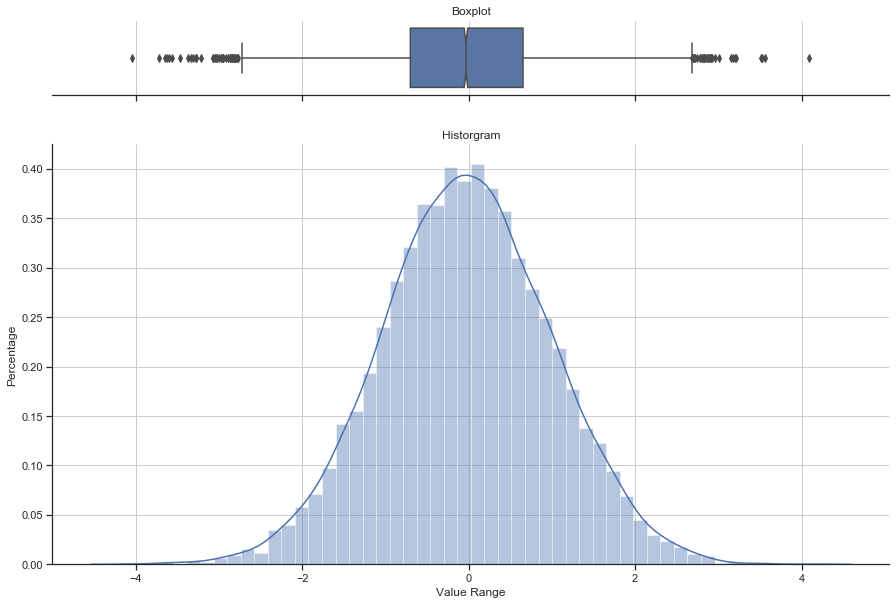

In [2]:
boxplot_histogram()

# Master File

## Load data

In [3]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\vkprog_analyse
C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


In [4]:
from pa_lib.data import desc_col

In [5]:
from vkprog_data_prep import bd_train_scoring

In [6]:
(training_all, scoring_all, feature_colnames_bd, feature_colnames_dates) = bd_train_scoring(
    day=23,
    month=9,
    year_score=2019,
    year_train=2018,
    year_span=4,
    scale_features=True)

2019-09-23 14:47:42 [INFO] Reading from file C:\Users\stc\data\vkprog\bd_data.feather
2019-09-23 14:47:42 [INFO] Finished loading binary file in 0.17s (0.86s CPU)
2019-09-23 14:47:44 [INFO] Period: KW_2
2019-09-23 14:47:44 [INFO] Calculate Reservation...
2019-09-23 14:47:44 [INFO] Calculate Aushang...
2019-09-23 14:47:44 [INFO] Merge Results...
2019-09-23 14:47:44 [INFO] aggregate_bookings: Done.
2019-09-23 14:47:44 [INFO] current_yyyykw: 201939
2019-09-23 14:47:44 [INFO] training_yyyykw:201839
2019-09-23 14:47:44 [INFO] Computing: Pivot Table
2019-09-23 14:47:45 [INFO] Running: booking_yearly_totals(YYYYKW, year_span) 
2019-09-23 14:47:45 [INFO] Computing: Yearly total sums
2019-09-23 14:47:45 [INFO] Merging: Left-Join to Container dataframe
2019-09-23 14:47:45 [INFO] Merging: Left-Join to Container dataframe
2019-09-23 14:47:45 [INFO] Merging: Left-Join to Container dataframe
2019-09-23 14:47:45 [INFO] Merging: Left-Join to Container dataframe
2019-09-23 14:47:45 [INFO] Final merge
2

In [8]:
training_all.describe()

,Endkunde_NR,Erste_Buchung_Delta,Letzte_Buchung_Delta,Erste_Letzte_Buchung_Delta,Netto_Sum_Aus_RY_0_KW_1,Netto_Sum_Aus_RY_0_KW_11,Netto_Sum_Aus_RY_0_KW_13,Netto_Sum_Aus_RY_0_KW_15,Netto_Sum_Aus_RY_0_KW_17,Netto_Sum_Aus_RY_0_KW_19,...,Target_Sum_Aus_RY_0_KW_39,Target_Sum_Res_RY_0_KW_39,Netto_Sum_Aus_RY_0,Netto_Sum_Res_RY_0,Netto_Sum_Aus_RY_1,Netto_Sum_Res_RY_1,Netto_Sum_Aus_RY_2,Netto_Sum_Res_RY_2,Netto_Sum_Aus_RY_3,Netto_Sum_Res_RY_3
count,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,...,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000,18003.000000
mean,485050.424096,0.391571,0.135616,0.292941,0.032810,0.018464,0.028818,0.017104,0.030254,0.017269,...,0.023409,0.023380,0.266975,0.259632,0.267759,0.262583,0.279641,0.271942,0.279279,0.278762
std,186662.811738,0.289579,0.152127,0.307696,0.143494,0.107028,0.129294,0.102330,0.135663,0.104390,...,0.120170,0.118754,0.284604,0.284913,0.276718,0.281474,0.280691,0.279344,0.291397,0.290046
min,100034.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472931.500000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,574381.000000,0.272727,0.125000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371506,0.317957,0.000000,0.000000
75%,614320.500000,0.727273,0.250000,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.540298,0.540294,0.526841,0.533050,0.537117,0.532386,0.553616,0.551227
max,651482.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#desc_col(training_all)

Target_Res_flg == False


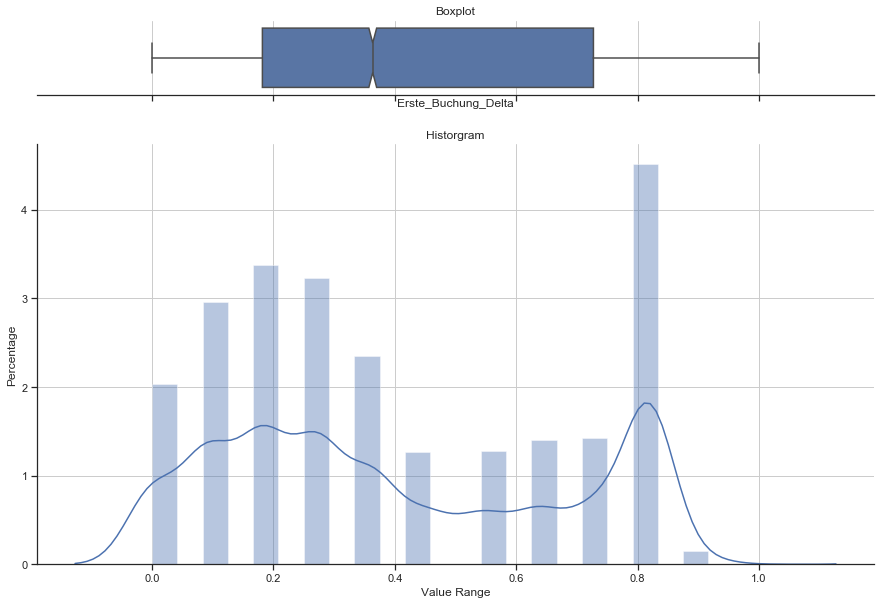

Target_Res_flg == True


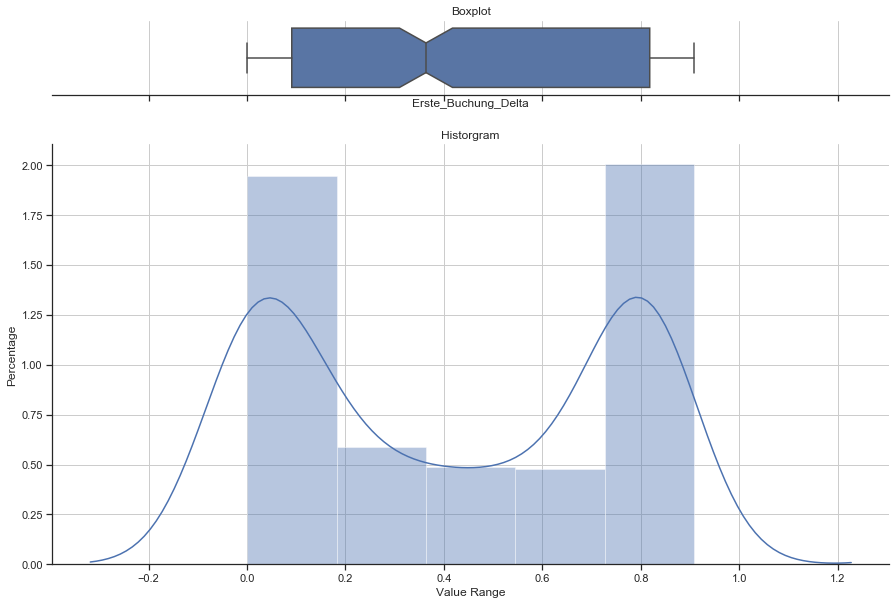

Target_Res_flg == False


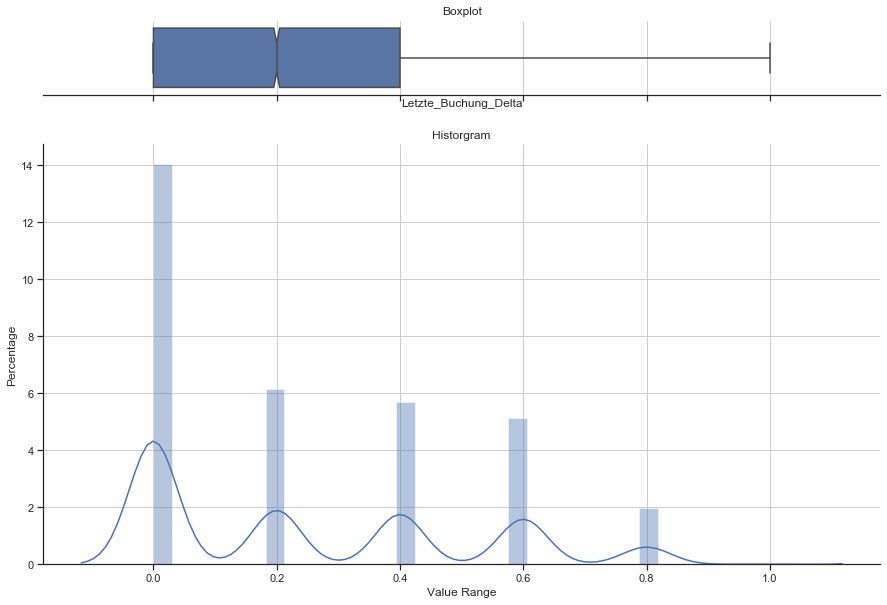

Target_Res_flg == True


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


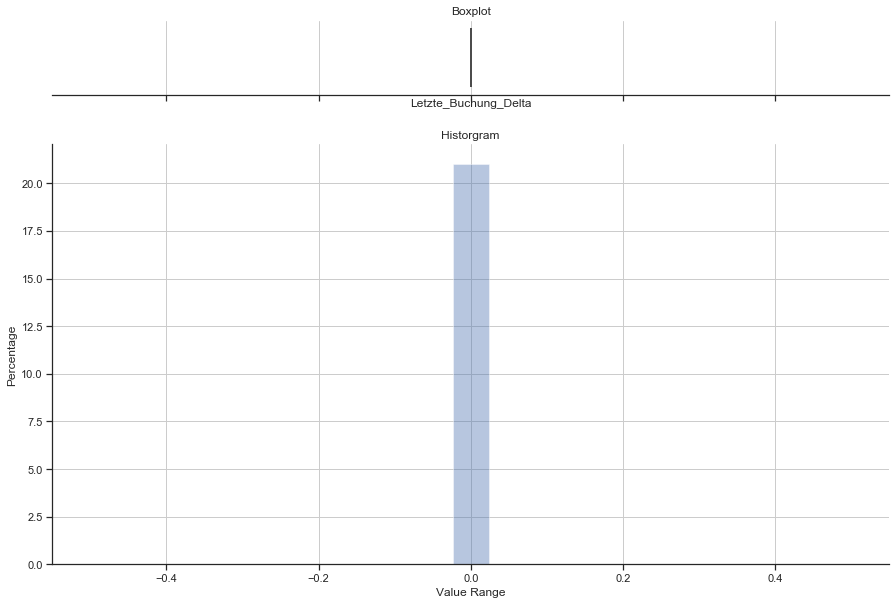

Target_Res_flg == False


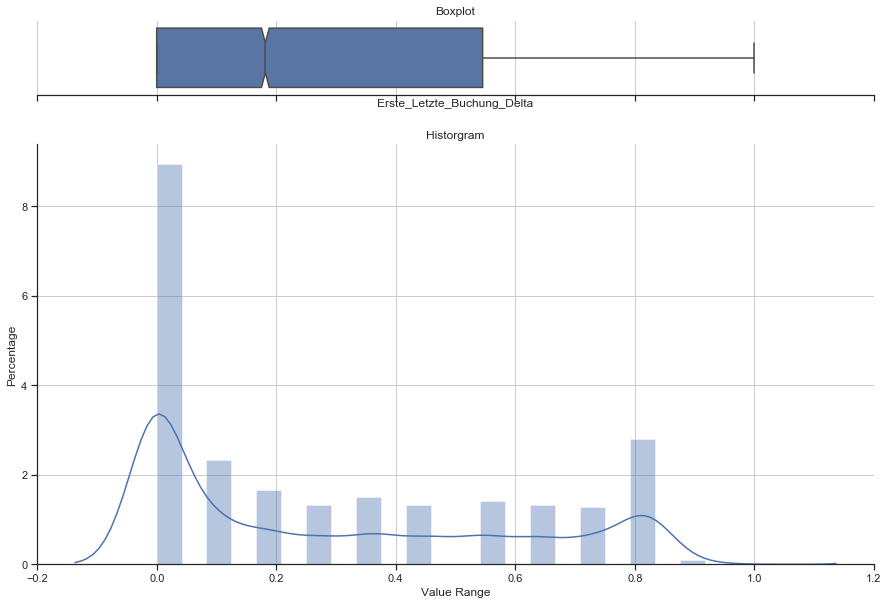

Target_Res_flg == True


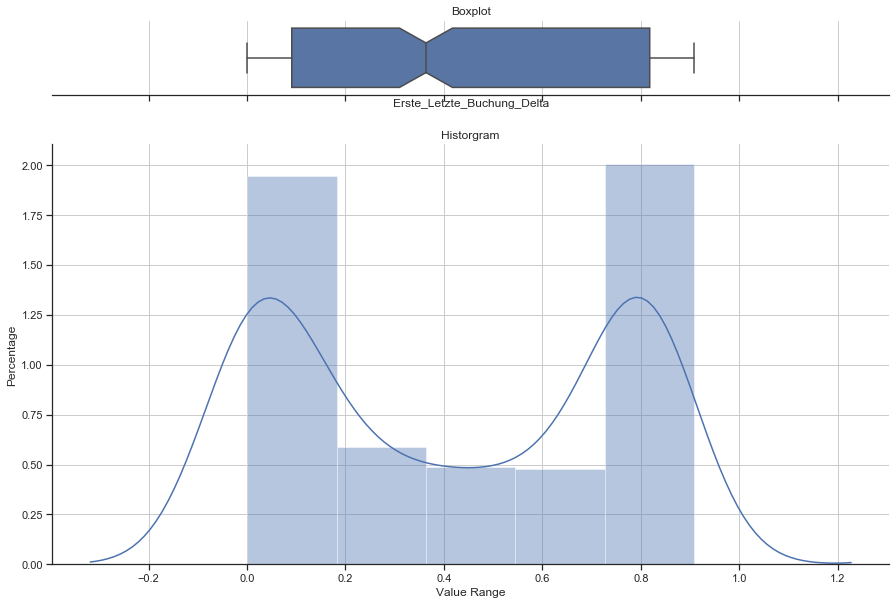

In [56]:
temp_df = training_all
print("Target_Res_flg == False")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == False ,"Erste_Buchung_Delta"])
print("Target_Res_flg == True")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == True ,"Erste_Buchung_Delta"])

print("Target_Res_flg == False")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == False ,"Letzte_Buchung_Delta"])
print("Target_Res_flg == True")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == True ,"Letzte_Buchung_Delta"])


print("Target_Res_flg == False")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == False ,"Erste_Letzte_Buchung_Delta"])
print("Target_Res_flg == True")
boxplot_histogram(temp_df.loc[ temp_df.Target_Res_flg == True ,"Erste_Letzte_Buchung_Delta"])

In [30]:
training_all.shape

(18003, 226)

In [31]:
from itertools import compress
features = feature_colnames_bd + feature_colnames_dates
feature_columns = list(compress(features,["Target" not in s for s in features]))
target_columns  = list(compress(training_all.columns,["Target" in s for s in training_all.columns]))

In [32]:
target_columns

['Target_Aus_flg',
 'Target_Res_flg',
 'Target_Sum_Aus_RY_0_KW_39',
 'Target_Sum_Res_RY_0_KW_39']